<a href="https://colab.research.google.com/github/Alanfideliz96/inter_tecnicas-_supervisionadas/blob/main/Pisa_ModelosN%C3%A3oSupervisionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Instalação dos pacotes

!pip install pingouin
!pip install factor_analyzer




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.1-py2.py3-none-any.whl size=42565 sha256=de1f46f2aa4be61428b82f5516602a0bbb2e7f49a92bc881f5e540e5e6c02a5d
  Stored in directory: /root/.cache/pip/wheels/24/59/82/6493618e30ed1cb7a013b9e1b0c9e17de80b04dfcef4ba8a4d
Successfully built factor_analyzer


In [7]:
#Importações das bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg
import plotly.express as px
import plotly.io as pio
pio.renderers.default='browser'
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import plotly.graph_objects as go

In [8]:
#importanto o banco de dados

caminho_csv='/content/drive/MyDrive/Colab USP EXALQ/Unsupervised Machine Learning: Exercícios Aplicados/Modelos Não Supervisionados/notas_pisa.csv'

csv_pisa = pd.read_csv(caminho_csv, delimiter=',')

csv_pisa

,country,group,mathematics_2022,reading_2022,science_2022,mathematics_2018,reading_2018,science_2018
0,Australia,OECD,487.08425354734698,498.05093978372099,507.000869417628,491.36002524732402,502.63172429646698,502.96456281136602
1,Austria,OECD,487.26749908879401,480.40584721829902,491.27095877058503,498.94231377018502,484.39256846788697,489.78043922683503
2,Belgium,OECD,489.48681680184899,478.852668384217,490.57834610681402,508.07030630262301,492.86443865136602,498.77312702853197
3,Canada,OECD,496.94789438732198,507.13289582796602,515.01667592948297,512.01694292684499,520.08552094974402,517.99766085055001
4,Chile,OECD,411.69657073076701,447.97895734953102,443.54340246277798,417.40655630857901,452.27255418349699,443.58256338022699
...,...,...,...,...,...,...,...,...
91,Ukraine (18 of 27 Regions),PARTNERS,440.845308795775,427.52695238230302,450.18723803106599,—,—,—
92,United Arab Emirates,PARTNERS,431.11047671894499,417.34974998983603,431.97947107205999,434.94725191297999,431.78176948127998,433.63680283995899
93,Uruguay,PARTNERS,408.71206637471602,430.35972443854899,435.38477291356702,417.66161725422802,427.11761816387201,425.81267658398599
94,Uzbekistan,PARTNERS,363.935374726188,335.504899734341,354.86356501185202,—,—,—


In [9]:
#informações gerais do dataset
csv_pisa.info()

#ao podemos verificar que os tipos do dados estão como objeto e não númerico, precisaremos fazer essa modificação.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   country           96 non-null     object
 1   group             96 non-null     object
 2   mathematics_2022  96 non-null     object
 3   reading_2022      96 non-null     object
 4   science_2022      96 non-null     object
 5   mathematics_2018  96 non-null     object
 6   reading_2018      96 non-null     object
 7   science_2018      96 non-null     object
dtypes: object(8)
memory usage: 6.1+ KB


In [10]:
#Temos duas categorias na variável grupo, OECD e Partners, será que é possível avaliar esse output da análise fatorial ?
#Analise fatorial nas variávels métricas de 2022 + A variável de grupo precisarei de fazer algumas etapas intermediárias


In [11]:
#vamos analisar apenas as notas de 2022, portanto jogaremos fora as outras váriaveis

csv_pisa.drop(columns=['mathematics_2018', 'reading_2018', 'science_2018'], inplace=True)


In [17]:
#Ajustando as variáveis de notas para numéricas

csv_pisa['mathematics_2022'] = pd.to_numeric(csv_pisa['mathematics_2022'], errors='coerce')
csv_pisa['reading_2022'] = pd.to_numeric(csv_pisa['reading_2022'], errors='coerce')
csv_pisa['science_2022'] = pd.to_numeric(csv_pisa['science_2022'], errors='coerce')

#vou o shape para ver a dimensão de dados que estava e quanto que vai ficar
csv_pisa.shape

(81, 5)

In [18]:
#removendo os valores "NaN"

csv_pisa.dropna(inplace=True)
csv_pisa.shape

(81, 5)

In [21]:
#vamos transformar as variáveis metricas então para fatores
#Iniciando a análise fatorial PCA

pisa_pca = csv_pisa.drop(columns=['country', 'group'])

<Axes: >

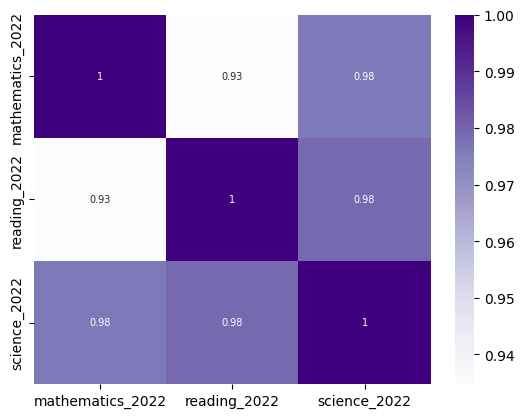

In [24]:
#analise descritiva, o pilar
#O pilar do PCA é as correlações de Pearson
# por isso começaremos calculando a matriz de correlação e na sequencia plotarei no seaborn

#Calculando a matriz de correlação

matriz_correlacao = pisa_pca.corr()

#plotando o grafico

sns.heatmap(matriz_correlacao, annot=True,
            cmap = plt.cm.Purples,
            annot_kws={'size':7})

In [ ]:
#Podemos ver que as correlações estão bem altas, próximas de um e isso é bom, pois correlações elevadas propiciam
#a extração de um único fator. Se eu tenho correlações muito altas significa que eu consigo representar essas correlações
#em fatores. Seria ruim se fossem proximas de 0.